# ***Americas Electronic Goods Transcation  Analysis***
![theme image](https://drive.google.com/uc?id=1NR15YfPg4yfqLXbXlZizquuJscBiNESn)
##### Analysed by ***Mithil***

### In 2019, 

### World's revenue in the Consumer Electronics segement is around 3,15,517 Million dollars(US).
### Where, Americas revenue in the Consumer Electronics segment is around 342.89 Billion dollars(US).

### So, To gain Money, We need profits. To gain profits, We need to analyse the data from the previous year. 

### Here, we have "**5 Key Major Business problems**" faced by vendors that we are going to solve.

## 1.What was the Best and Poor month for sales?
## 2.What were the cities that sold the most product and the least product?
## 3.What was the Best and Poor time to display advertisements ?
## 4.What were the products that are most often sold together?
## 5.What was the Highest and the Least sold product?and why do you think so?




## Section 1: Data Cleaning 

### Import the required library files

In [1]:
import pandas as pd # pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.where, matplotlib. pyplot is a module in matplotlib
import calendar
from itertools import combinations # Python's Itertool is a module that provides various functions that work on iterators to produce complex iterators. This module works as a fast, memory-efficient tool that is used either by themselves or in combination to form iterator algebra.
from collections import Counter # This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

#### The data is collected from [**KAGGLE**](https://www.kaggle.com/mithil1729/united-states-e-goods-sales)

In [2]:
data = pd.read_csv("data19.csv")# if you have downloaded from github change this "data19.csv" to "data/data19.csv"
data.head(10)# default value is 5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [3]:
# lets check for the total data
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Identify and Drop rows of NAN

In [4]:
# we have around 186850 rows, now cleaning starts
# find the nan values
nan = data[data.isna().any(axis=1)]
#axis=0, or ‘index’ : Drop rows which contain missing values.
#axis=1, or ‘columns’ : Drop columns which contain missing value.

nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#we have 545 rows with nan values 
data = data.dropna(how='all')
#‘any’ : If any NA values are present, drop that row or column.
#‘all’ : If all values are NA, drop that row or column.

data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [6]:
# confirming that there are no nan values
nan = data[data.isna().any(axis=1)]
nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Make columns correct type

In [7]:
tm = data[data['Price Each']=='Price Each']# knowing if any text is present in the rows
tm

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# we have 355 text columns
data = data[data['Order Date'].str[0:2]!='Or']# getting rid of text in date column
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [9]:
sm = data[data['Price Each']=='Price Each']# checking for the text
sm

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
data# checking the data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Section 2: Data Processing

In [11]:
# So we have nearly 185950 rows. where the  difference goes about 900 error/waste values.
# changing those columns type into numeric type ones
data.iloc[2].dtypes
data.iloc[3].dtypes

dtype('O')

In [12]:
# can assign any reference type (string, array, class, or interface) to an Object variable
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

### Add a month column(for analysis)

In [13]:
data['Month'] = pd.to_datetime(data['Order Date']).dt.month.apply(lambda x: calendar.month_abbr[x])# here we are extracting the month from the date. 
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",Apr
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Apr
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Apr
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",Apr
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Apr


### Add city column(for analysis)

In [14]:

# Here we might have cities with same names with different states.So, we are considering the state for the accuracy
def city(add):
    return add.split(",")[1].strip(" ")
# Here we are spliting up the Address column by getting the first index and strip is used to remove the spaces in the beginning and the end.
def state(add):
    return add.split(",")[2].split(" ")[1]
#Here we are spliting up the second index and further extracting the first portion

data['City'] = data['Purchase Address'].apply(lambda x: f"{city(x)}  ({state(x)})")
#A lambda function can take any number of arguments, but can only have one expression.
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",Apr,San Francisco (CA)
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Apr,Seattle (WA)
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Apr,Atlanta (GA)
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",Apr,San Francisco (CA)
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Apr,Boston (MA)


## Section3: Data Analysis and Visualization

### Question 1: 
## What was the Best and Poor month for sales?

In [15]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Price Each'].astype('float')
#here we are a creating the sales column with the quantity ordered x price.
# we are going to groupby by month and sum it up as summation will be possible for only numeric type. 
data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558,3.367671e+06,3.390670e+06
Aug,13448,2.230345e+06,2.244468e+06
Dec,28114,4.588415e+06,4.613443e+06
Feb,13449,2.188885e+06,2.202022e+06
Jan,10903,1.811768e+06,1.822257e+06
Jul,16072,2.632540e+06,2.647776e+06
Jun,15253,2.562026e+06,2.577802e+06
Mar,17005,2.791208e+06,2.807100e+06
May,18667,3.135125e+06,3.152607e+06


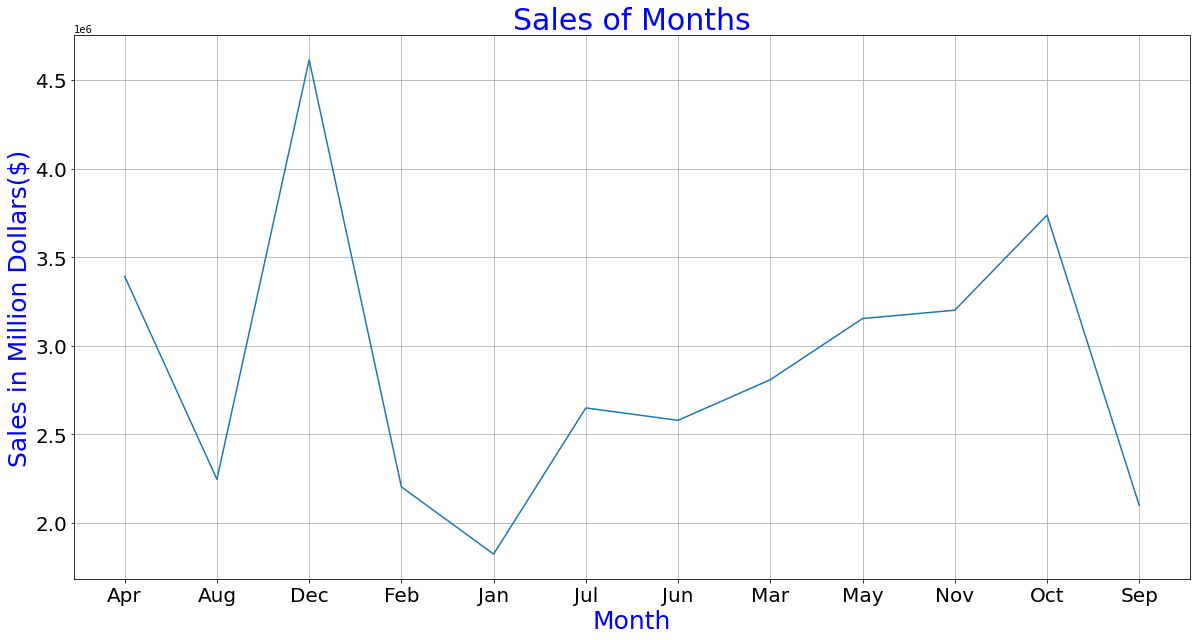

In [16]:
months = [month for month, df in data.groupby(['Month'])]# lower limit isn't accounted
plt.figure(figsize=(20,10))# figure size
plt.plot(months, data.groupby(['Month']).sum()['Sales'])#(x,y)-> data formats
plt.xticks(months, size =20)
plt.yticks(size =20)
plt.title('Sales of Months', size=30, color='b')
plt.xlabel('Month', size=25, color='b')
plt.ylabel('Sales in Million Dollars($)', size=25, color='b')
plt.grid()
plt.show()

#### From the above the  sales of months is 
## Answer :- 
## 1.Best month: **December** with**"Four Million Six Hundred Thirteen Thousand Dollars"** turnover.(May be due to Christmas)
## 2. Poor month:**January** with**"One Million Eight Hundred Twenty-Two Thousand  Dollars"** turnover.

### Question 2:
## What were the cities that sold the most product and the least product?

In [17]:
# let's have a look at on city column for first ten values
#data.iloc[0,7]: display only the first column
data.iloc[0:10, 7]#[x:y, z]x-starting value, y-ending value, z-index of column in total data

0            Dallas  (TX)
2            Boston  (MA)
3       Los Angeles  (CA)
4       Los Angeles  (CA)
5       Los Angeles  (CA)
6     San Francisco  (CA)
7           Seattle  (WA)
8           Atlanta  (GA)
9     San Francisco  (CA)
10           Boston  (MA)
Name: City, dtype: object

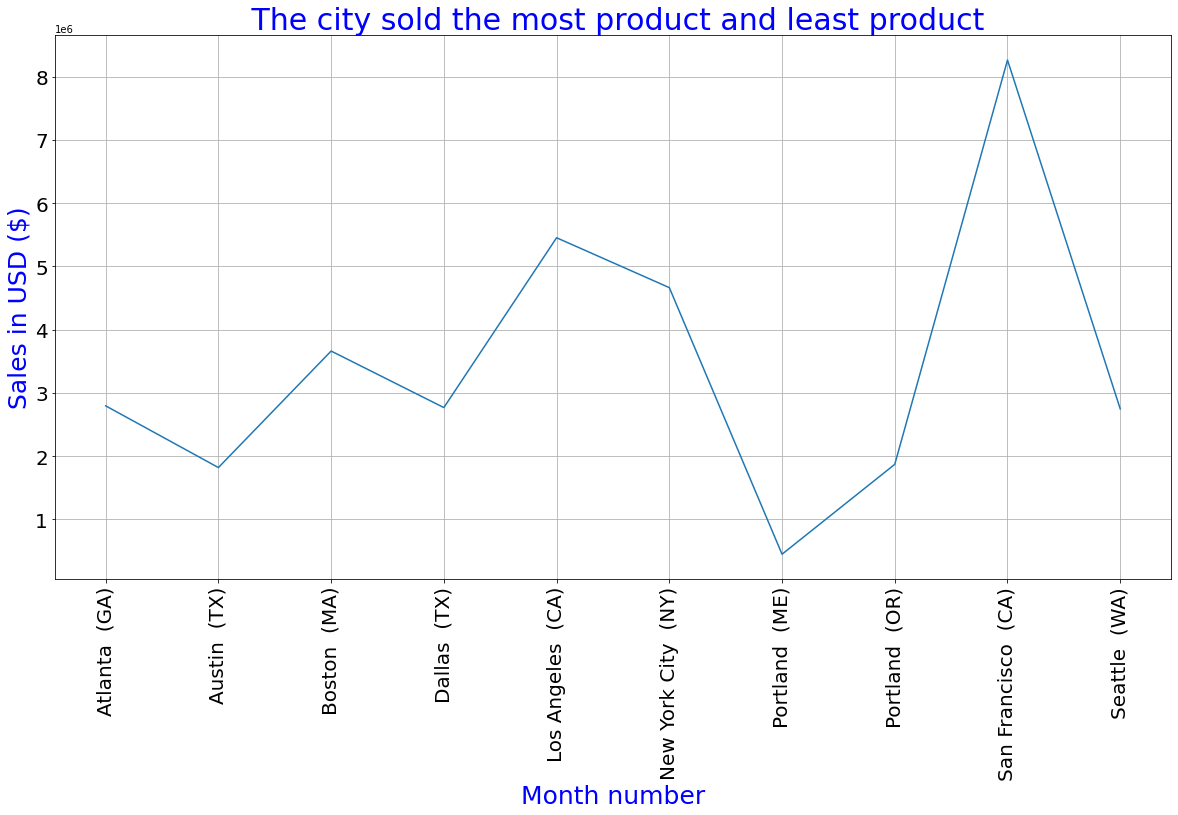

In [18]:
cities = [city for city, df in data.groupby(['City'])]# grouping up the cities.
# This is just standard Python list comprehension. It's a different way of writing a longer for loop. You're looping over all the characters in your string and putting them in the list if the character is a digit. 
plt.figure(figsize=(20,10))
plt.plot(cities,data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)', size=25, color='b')
plt.xlabel('Month number', size=25, color='b')
plt.title(' The city sold the most product and least product',size=30, color='b')
plt.xticks(cities, rotation='vertical', size=20)# horizantal naming is a bad idea, where names will be merged into one other.  
plt.yticks(size=20)
plt.grid()
plt.show()

#### For the above,  we can conclude that the city that sold the most product was
## Answer :-**San Francisco, California** with **"Eight Million Dollars"** turnover as highest. **Portland, Oregon** with **"Less than a Million Dollars"** turnover as least.


### Question 3:
## What was the Best and Poor time to display advertisements ?

In [19]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour# extracting the hour
#pd.to_datetime(data['Order Date']).dt.minute is used to extract the minute
#data=data.drop(columns='Count') -> experimental column
#data['Count']=1 -> experimental column
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,Dallas (TX),23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,Boston (MA),99.99,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA),11.99,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,Los Angeles (CA),11.99,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",Apr,San Francisco (CA),11.95,13
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Apr,Seattle (WA),99.99,7
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Apr,Atlanta (GA),11.95,10
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",Apr,San Francisco (CA),1700.00,10
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Apr,Boston (MA),11.99,14


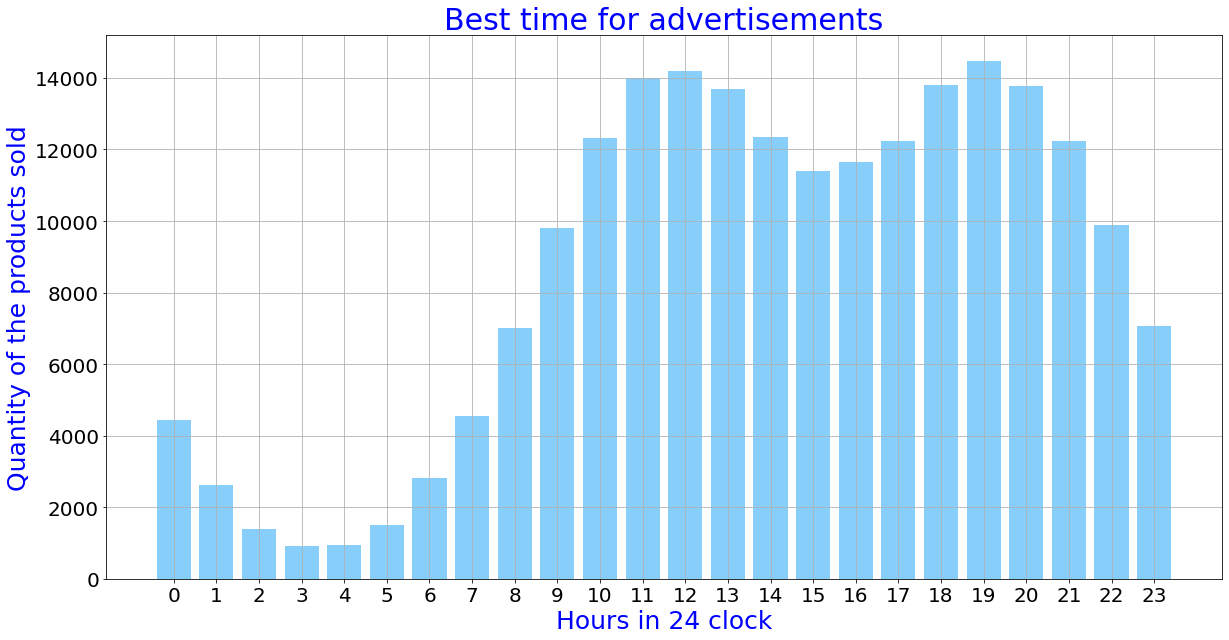

In [20]:
hours = [hour for hour, df in data.groupby(['Hour'])]
plt.figure(figsize=(20,10))
plt.bar(hours, data.groupby(['Hour']).sum()['Quantity Ordered'], color='lightskyblue')# we can also use count() instead of sum()
plt.ylabel('Quantity of the products sold',size=25, color='b')
plt.xlabel('Hours in 24 clock',size=25, color='b')
plt.title('Best time for advertisements',size=30,color='b')
plt.xticks(hours, size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

## Answer :-
#### From the above, we can conclude that the best time to display advertisements was
## 1. **11 AM to 12 PM**
## 2. **6 PM to 7 PM**
#### Poor time is about
## 1. **3 AM to 4 PM**

### Question 4:
## What were the products that are most often sold together?

In [21]:
# The ones with same order ids will be  brought together. 
# So let's check it out.
df = data[data['Order ID'].duplicated(keep=False)]
#keep{‘first’, ‘last’, False}, default ‘first’

#Determines which duplicates (if any) to mark.
#keep=first : Mark duplicates as True except for the first occurrence.
#keep=last : Mark duplicates as True except for the last occurrence.
#keep=False : Mark all duplicates as True.

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles (CA),11.99,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,Los Angeles (CA),600.00,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,Los Angeles (CA),11.95,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,Boston (MA),99.99,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",Sep,Atlanta (GA),3.84,20
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",Sep,Atlanta (GA),11.99,0
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",Sep,Atlanta (GA),5.98,0
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",Sep,San Francisco (CA),600.00,13


In [22]:
# There are nearly 14649 items, which were brought together
#A lambda function can take any number of arguments, but can only have one expression.
df['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

<ipython-input-22-8f11b143b95c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [23]:
# we have nearly 7136 pair products that brought togther without same orderid
# we are creating a python dictionary
count = Counter()# A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.

for r in df['Grouped']:
    row_list = r.split(',')# spliting the row with reference to that of ,
    count.update(Counter(combinations(row_list, 2)))# we are making dict to tuples and counting the number of times that it appeared 

for key,value in count.most_common(10):# high frequenced keys with their values are printed
    print("The products that brought together are ")
    print(key, "frequently with the count of", value)
# we can't visualize a dictonary, tools are still in developing stage.

The products that brought together are 
('iPhone', 'Lightning Charging Cable') frequently with the count of 1005
The products that brought together are 
('Google Phone', 'USB-C Charging Cable') frequently with the count of 987
The products that brought together are 
('iPhone', 'Wired Headphones') frequently with the count of 447
The products that brought together are 
('Google Phone', 'Wired Headphones') frequently with the count of 414
The products that brought together are 
('Vareebadd Phone', 'USB-C Charging Cable') frequently with the count of 361
The products that brought together are 
('iPhone', 'Apple Airpods Headphones') frequently with the count of 360
The products that brought together are 
('Google Phone', 'Bose SoundSport Headphones') frequently with the count of 220
The products that brought together are 
('USB-C Charging Cable', 'Wired Headphones') frequently with the count of 160
The products that brought together are 
('Vareebadd Phone', 'Wired Headphones') frequently w

## Answer:- 
#### From the above we conclude that the products that are most often sold together were
### 1. **'iPhone' and 'Lightning Charging Cable' by 1005 times**
### 2. **'Google Phone' and 'USB-C Charging Cable' by 987 times**
#### (Top two items having less variance.)

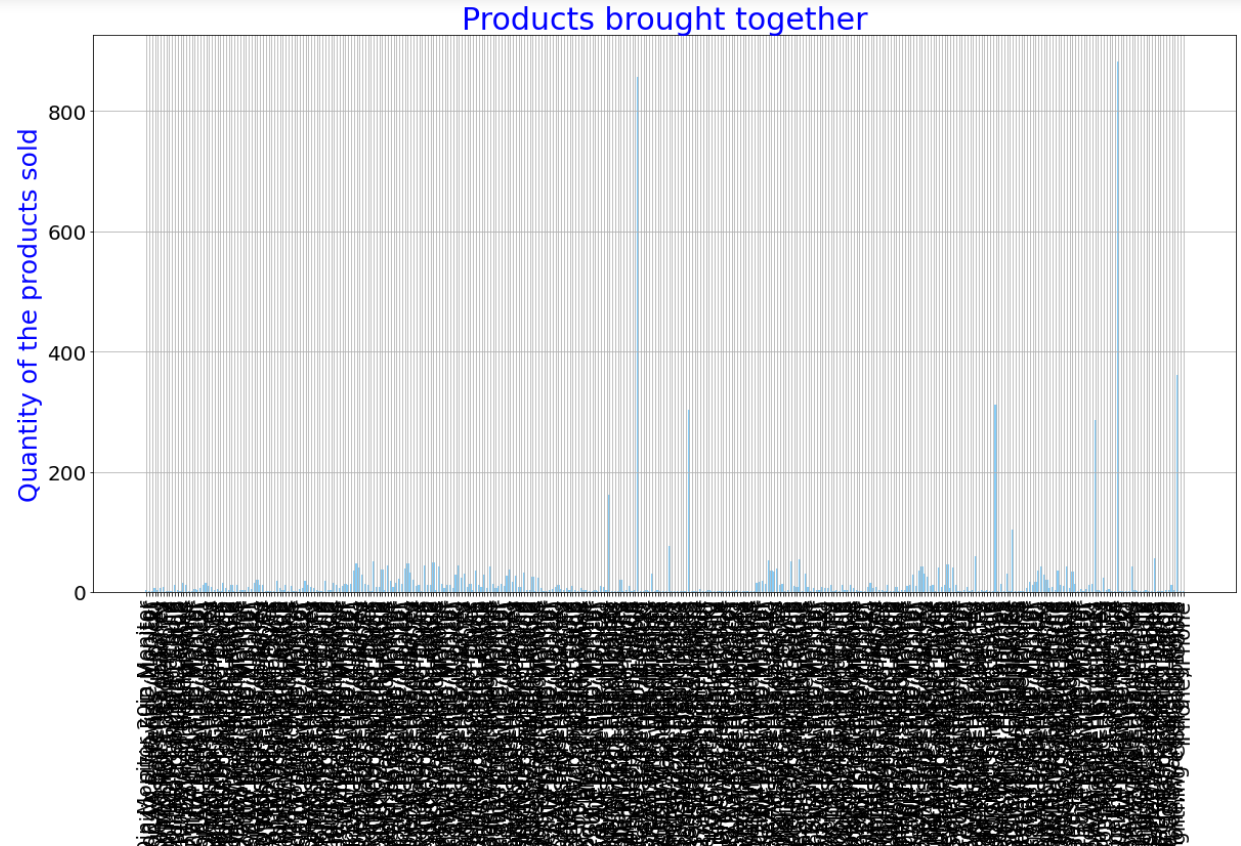

### This is how it looks like if we try to visualize the data because of the text data. So, lets go ahead and use other tools to print it out  

### Question 5:
## What was the Highest and the Least sold product? and why do you think so?

In [24]:
product_group = data.groupby('Product')
product_group.sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

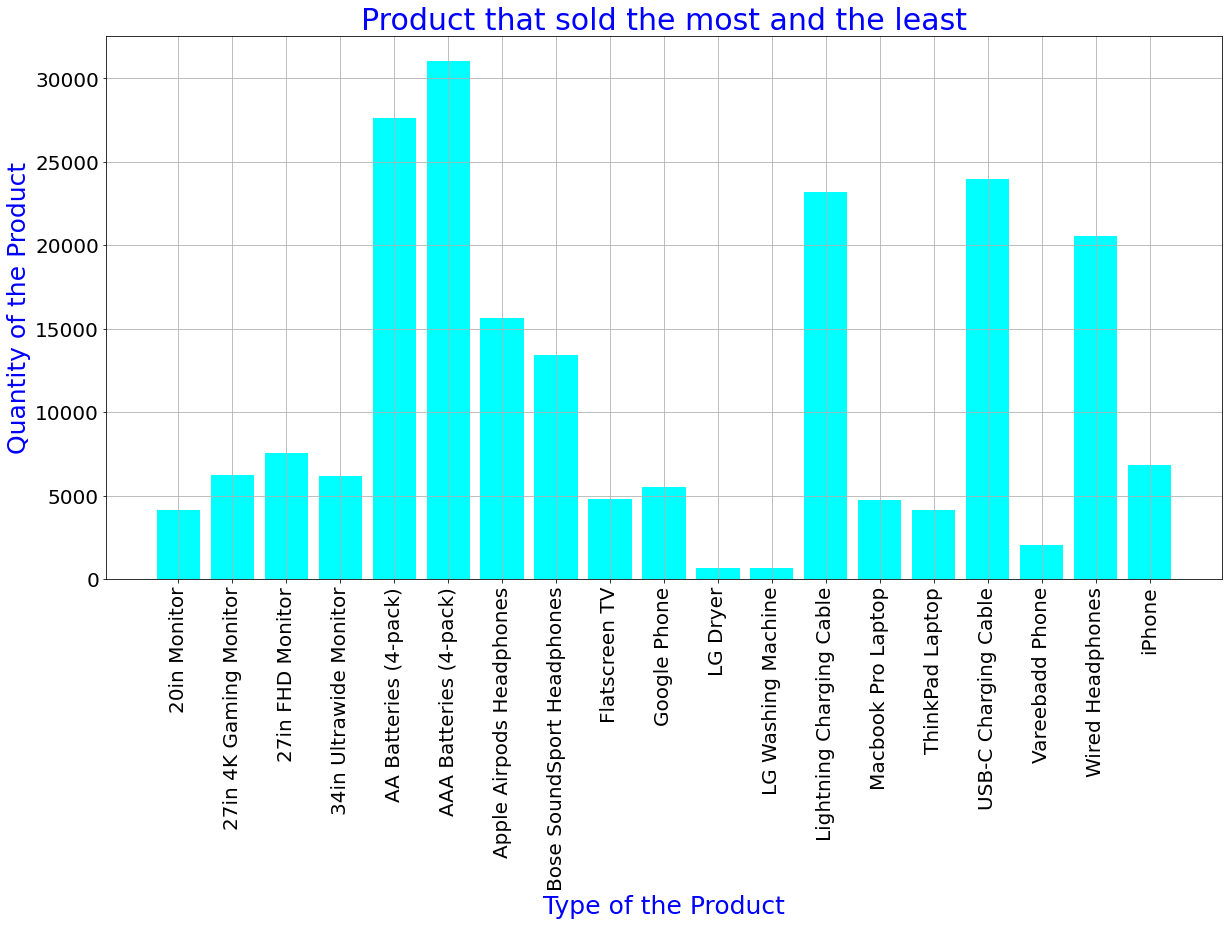

In [25]:
# we got the output data lets go ahead and visualize.
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
plt.figure(figsize=(20,10))
plt.bar(keys, quantity_ordered, color='aqua')
plt.xlabel('Type of the Product', size=25,color='b')
plt.ylabel('Quantity of the Product', size=25,color='b')
plt.title('Product that sold the most and the least', size=30,color='b')
plt.xticks(keys, rotation='vertical', size=20)# horizantal naming is a bad idea, where names will be merged into one other.
plt.yticks(size=20)
plt.grid()
plt.show()

## Answer:-
### From the above we can conclude that the highest sold product was
### **AAA Batteries(4-Pack)** with more than 31k assets.
### **LG dryer, washing machine** with nearly around 650 assets.

In [26]:
prices = data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

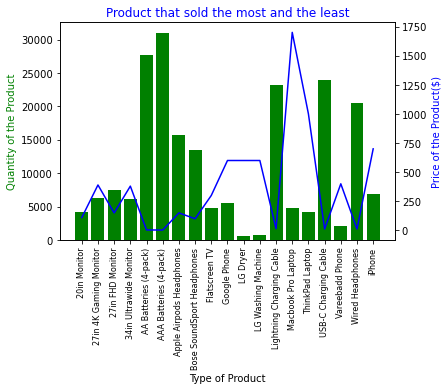

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()# The newly created Axes instance
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')
ax1.set_title('Product that sold the most and the least', size=12,color='b')
ax1.set_xlabel('Type of Product')
ax1.set_ylabel('Quantity of the Product', color='g')
ax2.set_ylabel('Price of the Product($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
plt.show()

### As the cost of AAA batteries is low(2 USD or 140 RS) and usage is high over daily basis, so AAA batteries are brought in  bulk quantity

### Finally, We got the required fields, to make profits in 2020(change the data and you can predict for the other years too).
## Thank you. Happy Learning!  